In [2]:
# -*- coding:utf-8 -*-
import openpyxl
from bs4 import BeautifulSoup
from urllib.request import urlopen
import csv, re, requests
import time

# 엑셀파일 열기
filename = "test.xlsx"
book = openpyxl.load_workbook(filename)

# 맨 앞의 시트 추출하기
sheet = book.worksheets[0]

# 시트의 각 행을 순서대로 추출하기
data = []
for row in sheet.rows:
    data.append([row[0].value, row[1].value,row[2].value])

del data[0]

for i in range(len(data)):
    print(data[i])


['NT930QCG-K58A', '박문규', '20.11.03']
['NT350XCR-AD5WA', '박문규', '20.11.05']
['15ZD90N-VX50K', '권규현', '20.10.29']
['15UD40N-GX36K', '이승호', '20.10.29']
['NT950XCR-G58A', '박문규', '20.10.29']
['17ZD90N-VX70K', '권규현', '20.10.29']
['NT950QCT-A58A', '권규현', '20.10.29']
['15ZD90N-HX56K', '임선정', '20.10.29']
['NT950XCR-A58A', '임선정', '20.10.29']
['NT950XCJ-X716A', '권규현', '20.10.29']
['MXK32KH/A', '박문규', '20.10.30']
['MVVK2KH/A', '박문규', '20.11.09']
['MSI GL75 Leopard 10SDK', '박문규', '20.11.07']


# Beautiful 빠르나 결국 URL당 접근하면 느려지기때문에 selenium 검색과 시간 비교

In [3]:
start = time.time()  # 시작 시간 저장
result=[]


for i in range(len(data)):
    if data[i][0]== None:
        break
    else:
        url = 'https://search.shopping.naver.com/search/all?query=' + data[i][0]
        print(url)
        req = requests.get(url)   # 크롤링할 페이지 url로 요청 보내기 , req를 출력하면 statuscode만 출력됨
        html = req.text                # html 코드를 가져온다!
        soup = BeautifulSoup(html, 'html.parser')
        if soup.find('span', class_="price_num__2WUXn").text == None:
                         result.append("해당상품없음")
        else:
            data[i].append(soup.find('span', class_="price_num__2WUXn").text)
            
# 작업 코드
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(data)

https://search.shopping.naver.com/search/all?query=NT930QCG-K58A
https://search.shopping.naver.com/search/all?query=NT350XCR-AD5WA
https://search.shopping.naver.com/search/all?query=15ZD90N-VX50K
https://search.shopping.naver.com/search/all?query=15UD40N-GX36K
https://search.shopping.naver.com/search/all?query=NT950XCR-G58A
https://search.shopping.naver.com/search/all?query=17ZD90N-VX70K
https://search.shopping.naver.com/search/all?query=NT950QCT-A58A
https://search.shopping.naver.com/search/all?query=15ZD90N-HX56K
https://search.shopping.naver.com/search/all?query=NT950XCR-A58A
https://search.shopping.naver.com/search/all?query=NT950XCJ-X716A
https://search.shopping.naver.com/search/all?query=MXK32KH/A
https://search.shopping.naver.com/search/all?query=MVVK2KH/A
https://search.shopping.naver.com/search/all?query=MSI GL75 Leopard 10SDK
time : 6.5688722133636475
[['NT930QCG-K58A', '박문규', '20.11.03', '1,831,000원'], ['NT350XCR-AD5WA', '박문규', '20.11.05', '839,000원'], ['15ZD90N-VX50K', '권규현

# DB에 해당 데이터 뿌려주기 

2. MSSQL 사용 절차,
Python에서 MSSQL에 있는 데이타를 사용하는 일반적인 절차는 다음과 같다.<br>

pymssql 모듈을 import 한다<br>
pymssql.connect() 메소드를 사용하여 MSSQL에 Connect 한다. 호스트명, 로그인, 암호, 접속할 DB 등을 파라미터로 지정할 수 있다.<br>
DB 접속이 성공하면, Connection 객체로부터 cursor() 메서드를 호출하여 Cursor 객체를 가져온다. DB 커서는 Fetch 동작을 관리하는데 사용된다.<br>
Cursor 객체의 execute() 메서드를 사용하여 SQL 문장을 DB 서버에 보낸다.<br>
SQL 쿼리의 경우 Cursor 객체의 fetchall(), fetchone(), fetchmany() 등의 메서드를 사용하여 데이타를 서버로부터 가져온 후, Fetch 된 데이타를 사용한다.<br>
삽입, 갱신, 삭제 등의 DML(Data Manipulation Language) 문장을 실행하는 경우, INSERT/UPDATE/DELETE 후 Connection 객체의 commit() 메서드를 사용하여 데이타를 확정 갱신한다.<br>
Connection 객체의 close() 메서드를 사용하여 DB 연결을 닫는다.<br>
아래 예제들의 기본 샘플 데이타로 아래와 같은 Customer 테이블이 있다고 가정하자.<br>

In [4]:
print(data[0][3])
print(type(data[0][3]))

1,831,000원
<class 'str'>


UTF-8 문제로인하여 해결되지않았던 문제를 해결함. <br>
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 11: invalid start byte <br>
위에 나온 문제가 계속나와서 별것도아닌걸로 계속 끙끙됌 

In [5]:
import datetime


now = datetime.datetime.now()
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2020-11-12


In [11]:
 # -*- coding: utf-8 -*-

import easygui
import pymssql
import pandas as pd

now = datetime.datetime.now()
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

# MSSQL 접속
conn = pymssql.connect(host=r"211.233.21.82", user='bif', password='DWBIF2020!@#', database='DB_PRICE', charset='utf8')

# Connection 으로부터 Cursor 생성
cursor = conn.cursor()
try:
    for i in range(len(data)-1):
        #SQL문 실행
        cursor.execute("INSERT INTO dbo.price_table(date, product_ID, price)  VALUES (%s,%s,%s);", (nowDate,data[i][0],data[i][3]))
except:
    easygui.msgbox('추가된 데이터 오류 혹은 중복 실행으로 인한 오류', '대원CTS 최저가 비교 크롤링')

else:   
    conn.commit()
    conn.close()

2020-11-12


# 디비로부터 데이터 추출

In [58]:

# MSSQL 접속
conn = pymssql.connect(host=r"211.233.21.82", user='bif', password='DWBIF2020!@#', database='DB_PRICE', charset='utf8')

# Connection 으로부터 Cursor 생성
cursor = conn.cursor()
 
# SQL문 실행
cursor.execute('SELECT * FROM dbo.price_table;')
row = cursor.fetchall()
cols = [item[0] for item in cursor.description]
df=pd.DataFrame(row,columns=cols)

df.head()

,date,product_id,price
0,2020-11-11,15UD40N-GX36K,"676,070¿ø"
1,2020-11-11,15ZD90N-HX56K,"1,392,820¿ø"
2,2020-11-11,15ZD90N-VX50K,"1,338,120¿ø"
3,2020-11-11,17ZD90N-VX70K,"1,581,850¿ø"
4,2020-11-11,MVVK2KH/A,"3,259,500¿ø"


In [59]:
import re

long=len(df['price'])

for i in range(long):
    slt=re.findall("[0-9]", df['price'][i])
    df['price'][i]=int(''.join(slt))
    
df.to_csv("C:\\Users\\user\\Desktop\\result.csv")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

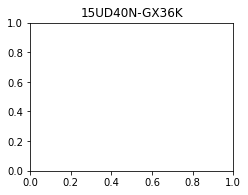

In [56]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title("15UD40N-GX36K")
plt.xlabel(df['product_id'])
plt.ylabel(df['price'])
plt.plot(np.random.randn(50),'g')
plt.subplot(2,2,2)
plt.title("15ZD90N-HX56K")
plt.plot(np.random.randn(50),'r')
plt.subplot(2,2,3)
plt.title("MVVK2KH/A")

plt.plot(np.random.randn(50))
plt.subplot(2,2,4)
plt.title("17ZD90N-VX70K")

x=np.arange(30)
y=np.arange(30) + np.random.randn(30)*5
plt.plot(x,y,'k--')